In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib import pyplot
import collections

In [2]:
df=pd.read_csv("bank-additional-full.csv",sep=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
#No null data
#Numeric Data:
numeric = ["age",'duration','pdays','pdays',
          'emp.var.rate','cons.price.idx','cons.conf.idx',
          'euribor3m','nr.employed','campaign']

categorical = [z for z in df.columns if z not in numeric]
categorical.remove('y')
predict = "y"

In [7]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

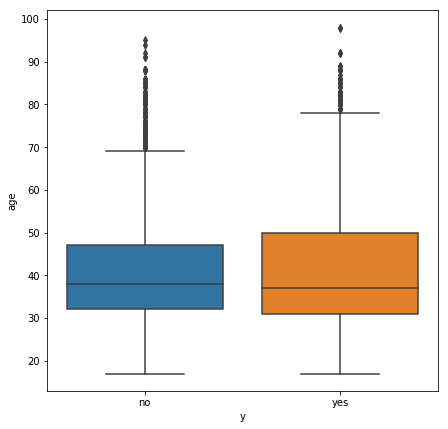

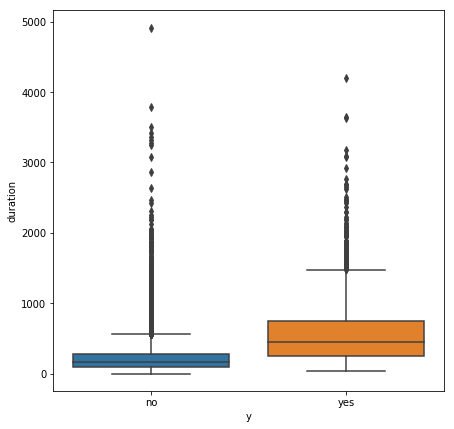

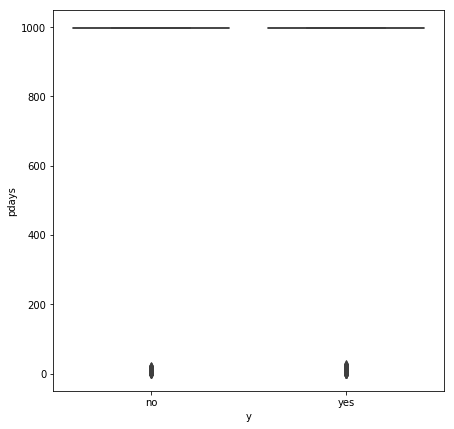

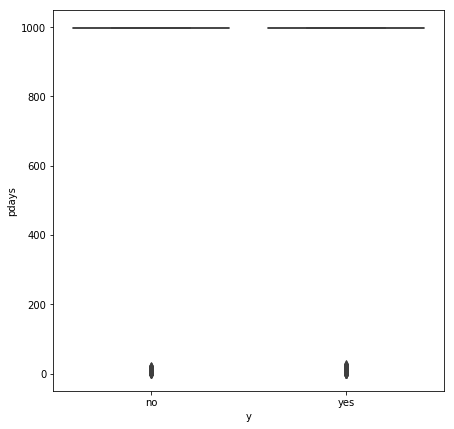

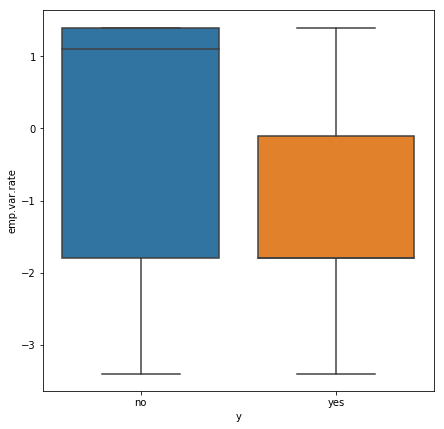

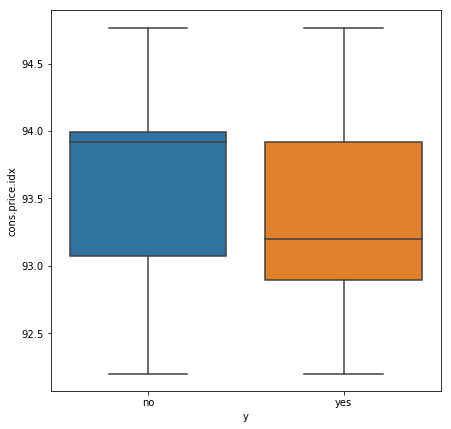

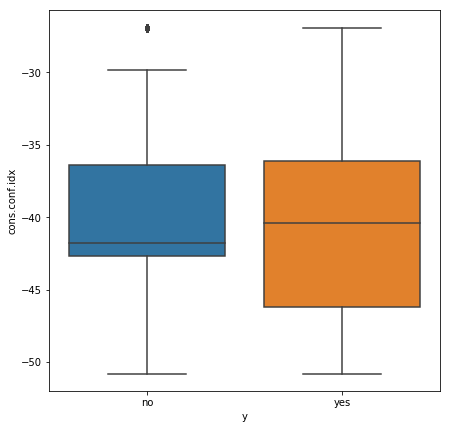

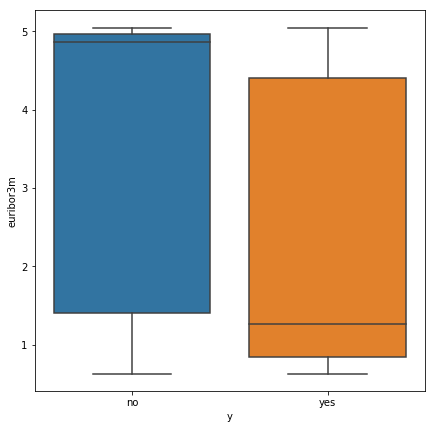

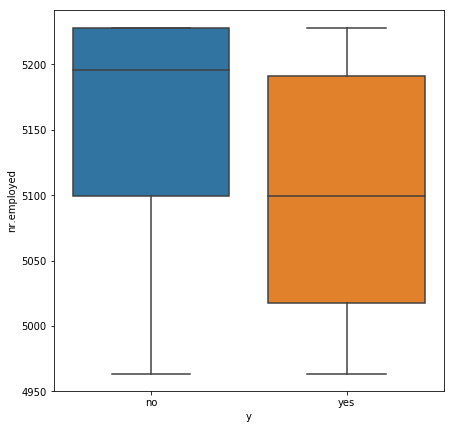

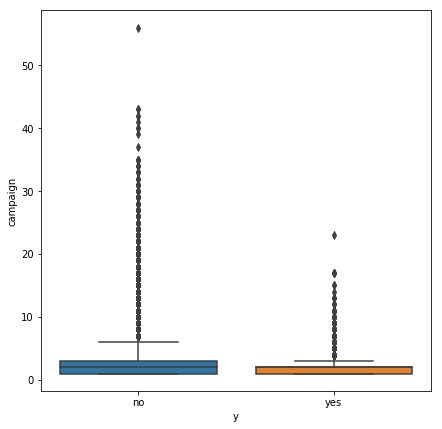

In [8]:
for i in numeric:
    plt.figure(figsize=(7,7))
    sns.boxplot(x=predict,y=i,data=df)
    plt.show()

Age is quite same for both the results which proves not to be a seperator related to classification.Previous attribute was having a great amount of information.

age


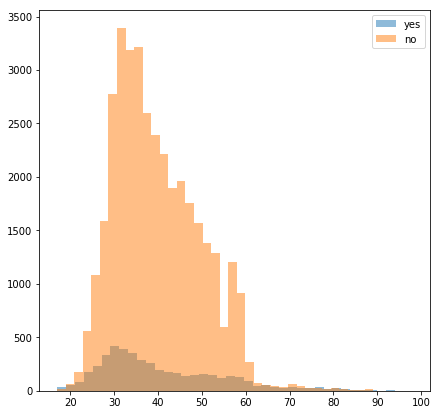

duration


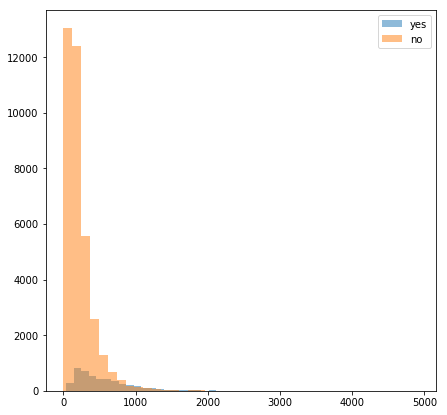

pdays


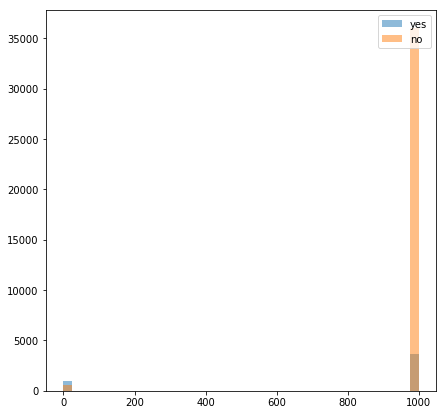

pdays


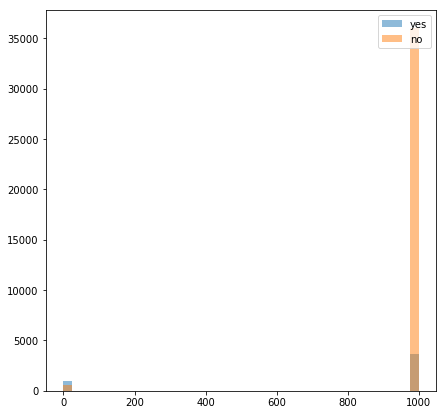

emp.var.rate


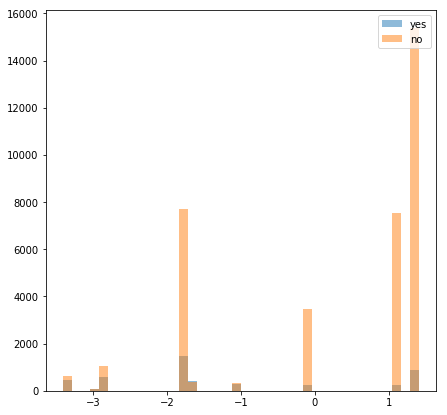

cons.price.idx


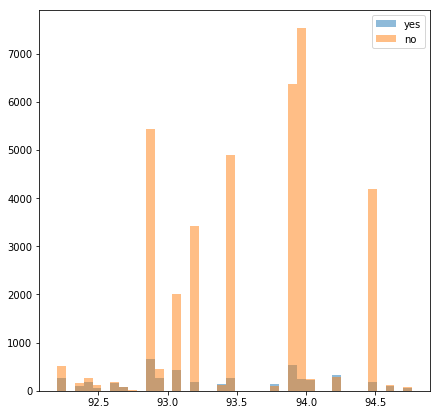

cons.conf.idx


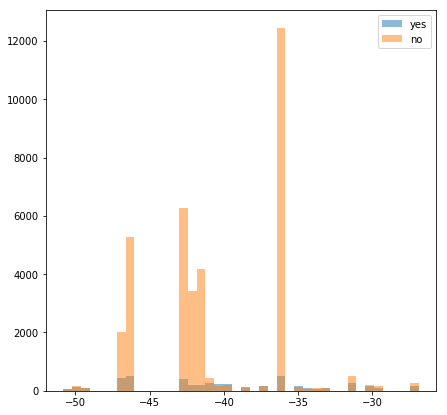

euribor3m


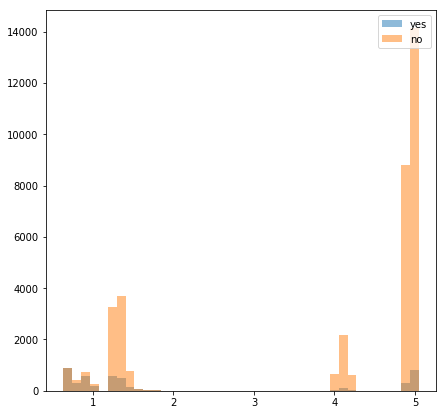

nr.employed


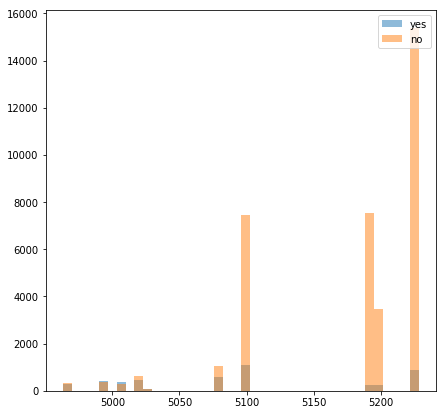

campaign


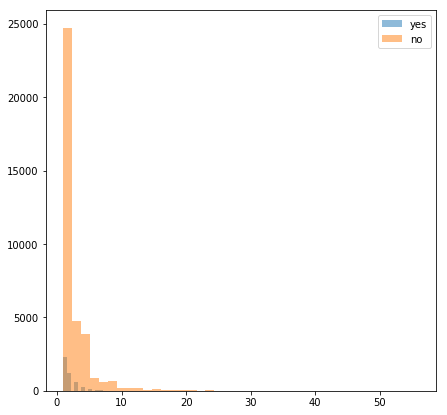

In [9]:
bins=40
for i in numeric:
    plt.figure(figsize=(7,7))
    pyplot.hist(df[df["y"]=="yes"][i].values,bins,alpha=0.5,label='yes')
    pyplot.hist(df[df["y"]=="no"][i].values,bins,alpha=0.5,label='no')
    pyplot.legend(loc='upper right')
    print(i)
    plt.show()

Here, we see that emp.var.rate and age have same categorical plots.The categorical plot shows that the distribution are similar or different.

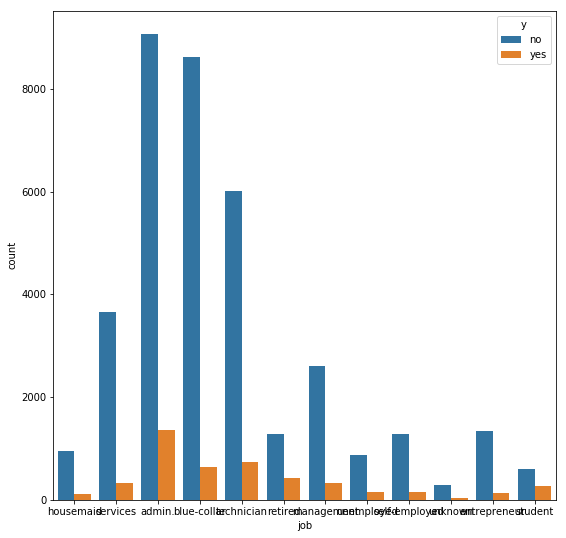

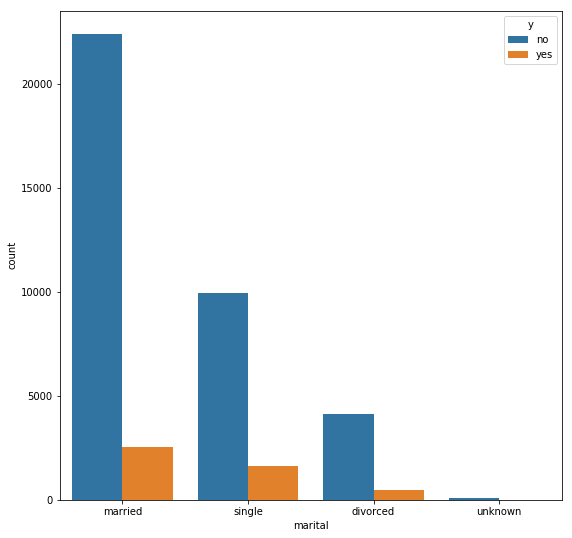

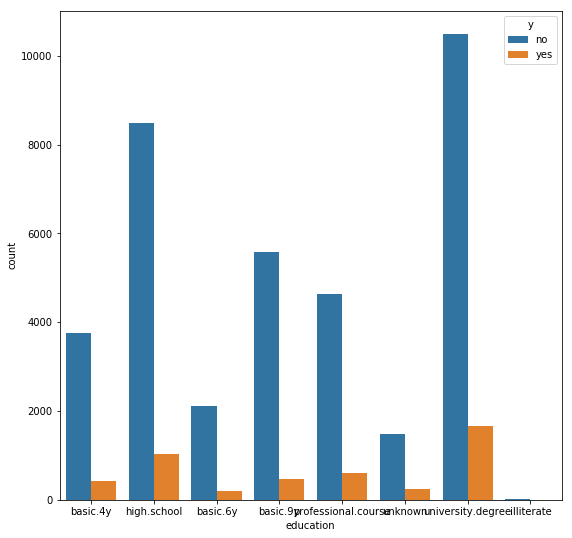

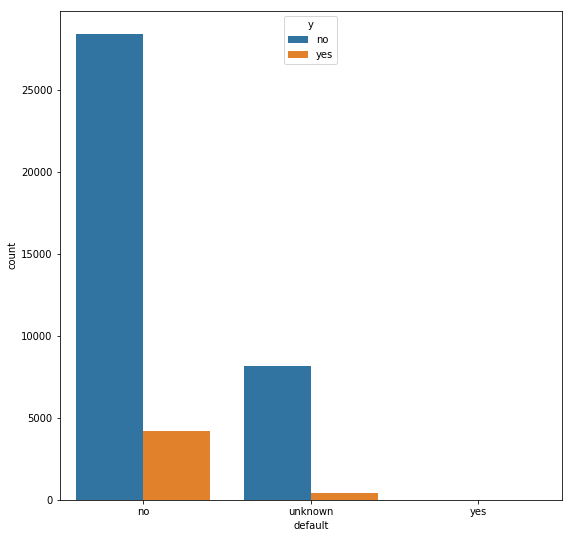

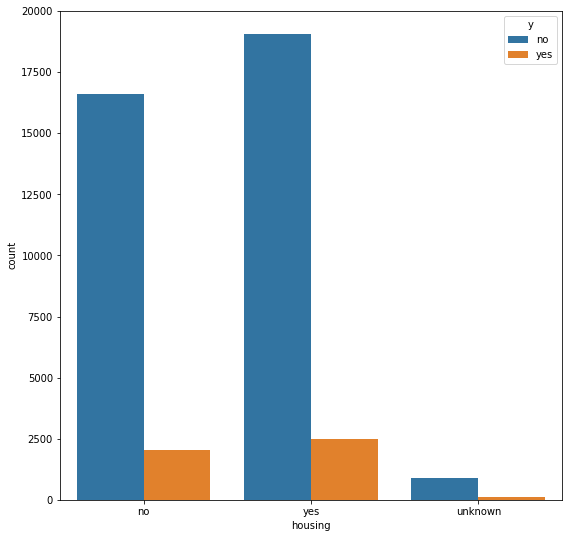

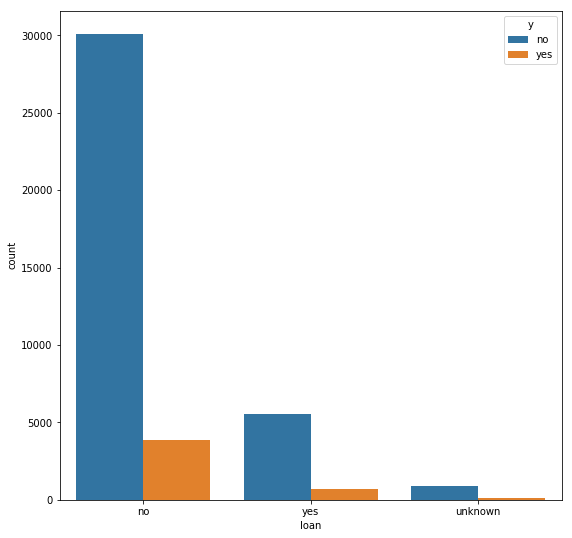

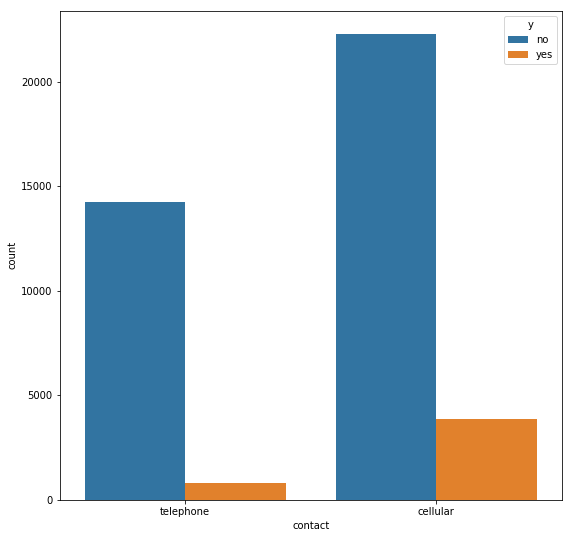

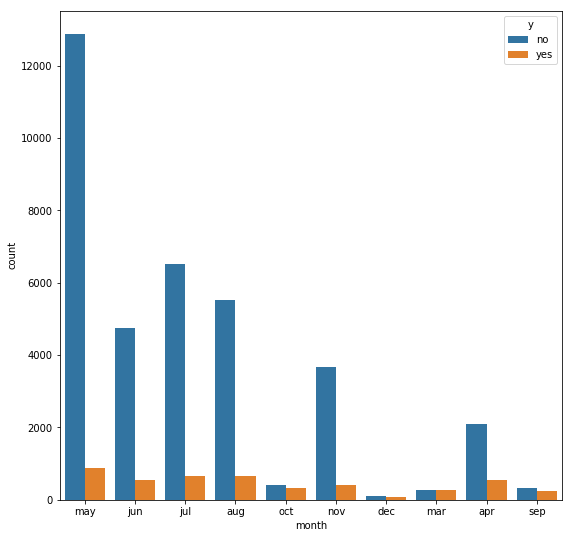

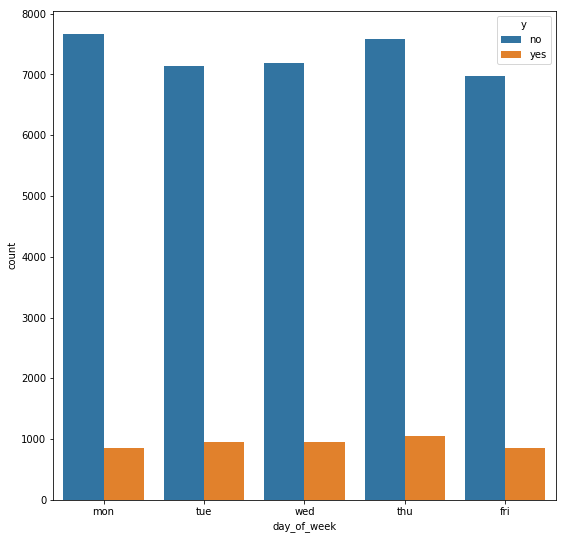

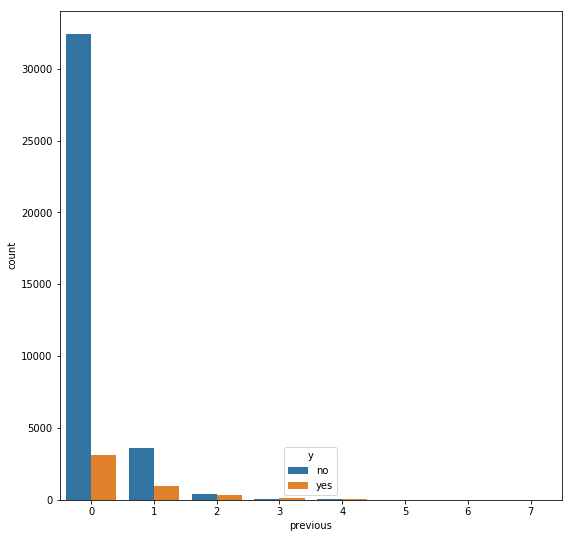

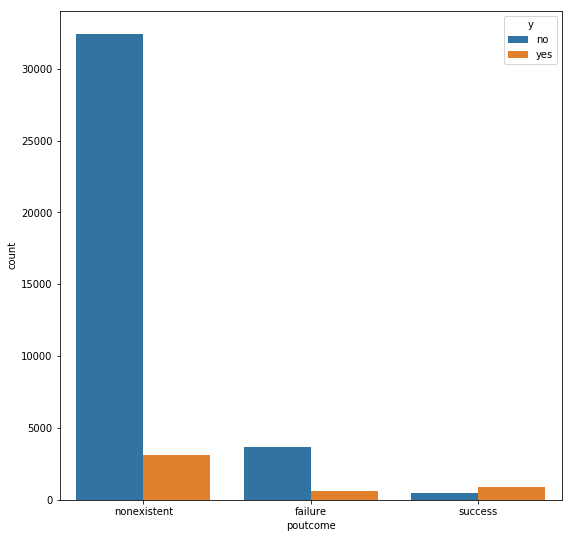

In [10]:
for i in categorical:
    plt.figure(figsize=(9,9))
    sns.countplot(x=i,hue=predict,data=df)
    plt.show()

1.There is no significant classification importance shown except the month attribute.
2.The pdays attribute values can be removed as it has nearly the same attribute values.

One-Hot Encoding for Categorical Variables

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
encoder=OneHotEncoder()
encoder.fit(df[categorical])
tr=encoder.transform(df[categorical]).toarray()

encoder_col=[str(i) for i in range(tr.shape[1])]
for no,i in enumerate(encoder_col):
    df[i]=tr[:,no]

In [13]:
df=df.drop(categorical,axis=1)

In [14]:
df=df.drop("pdays",axis=1)

In [18]:
numeric.remove("pdays")

The scatter plot of the numeric attributes and hue plot according to the target variables

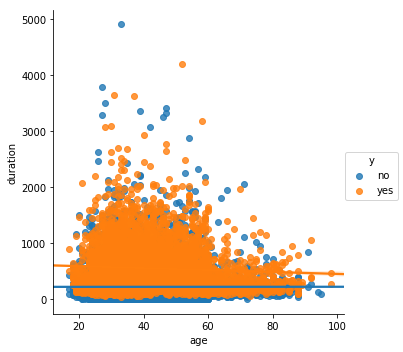

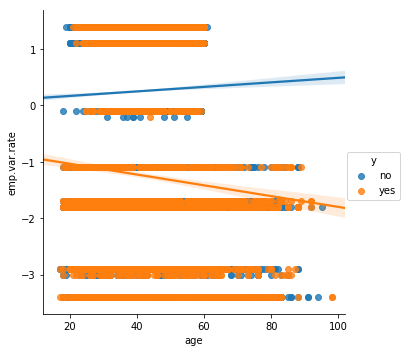

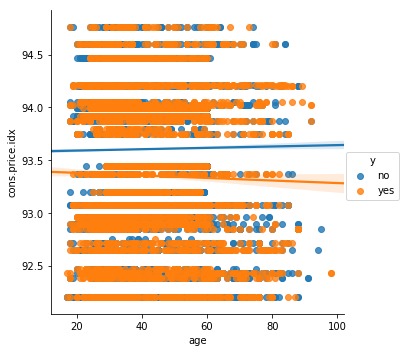

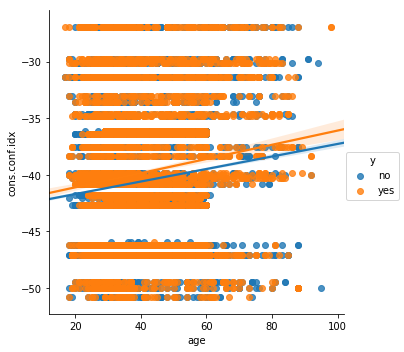

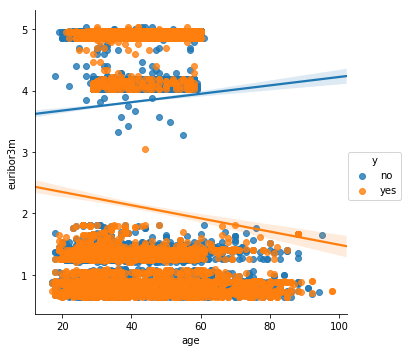

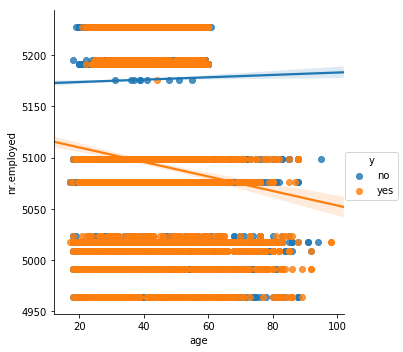

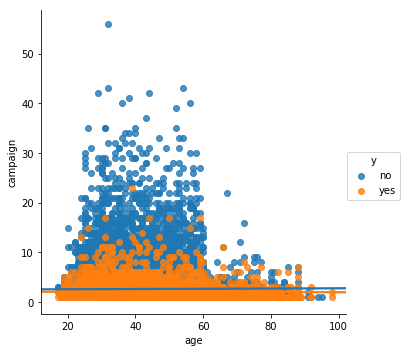

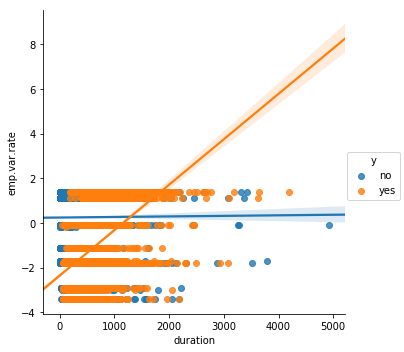

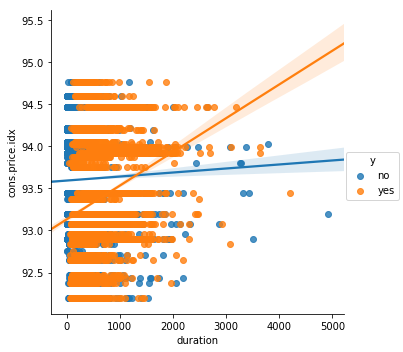

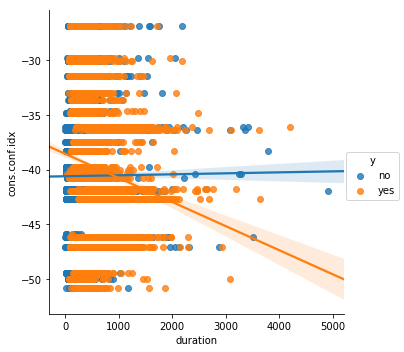

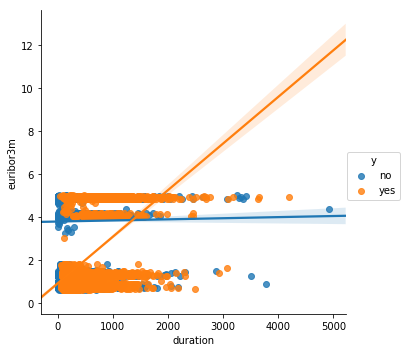

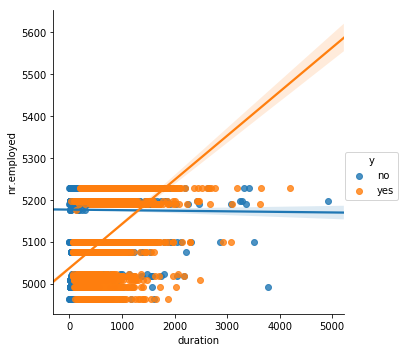

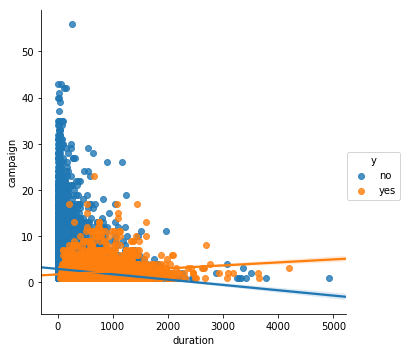

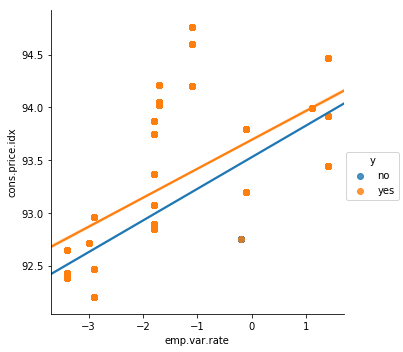

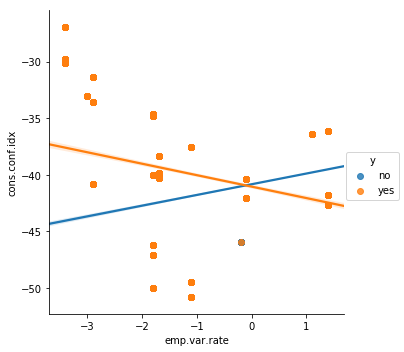

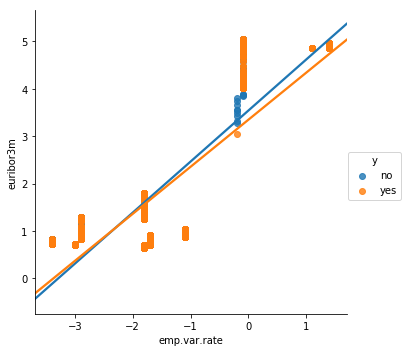

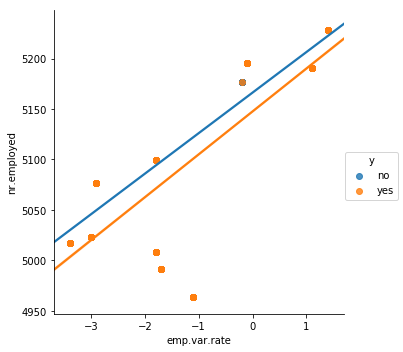

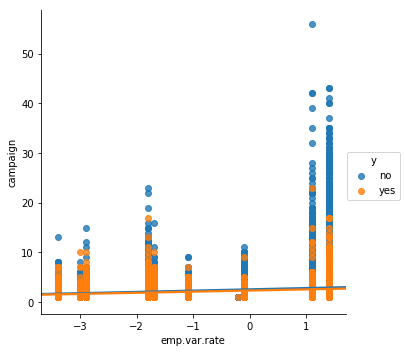

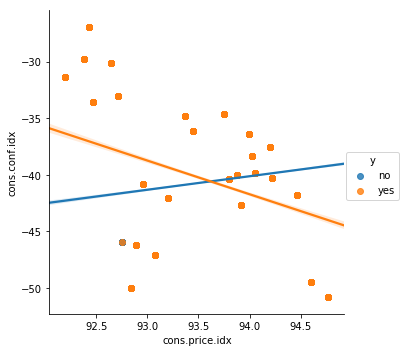

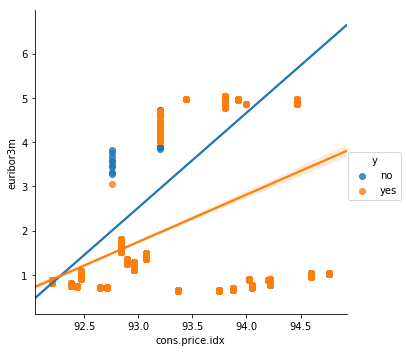

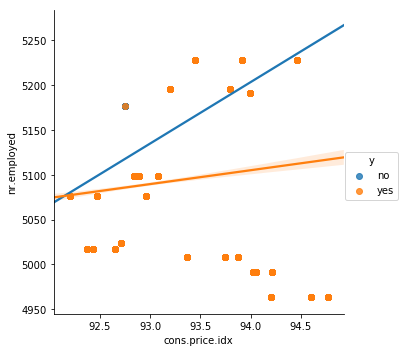

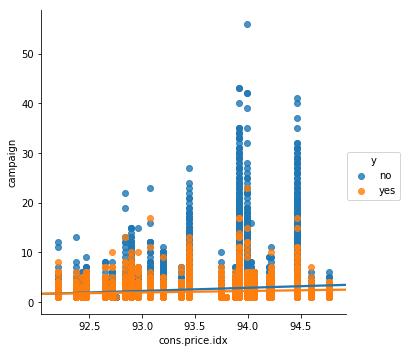

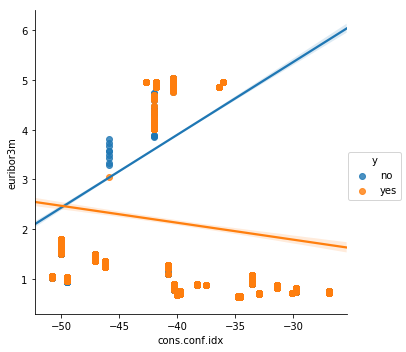

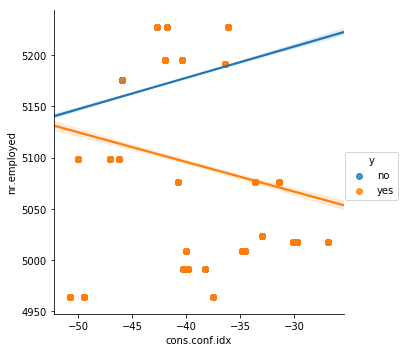

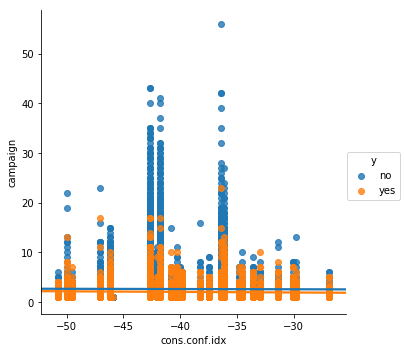

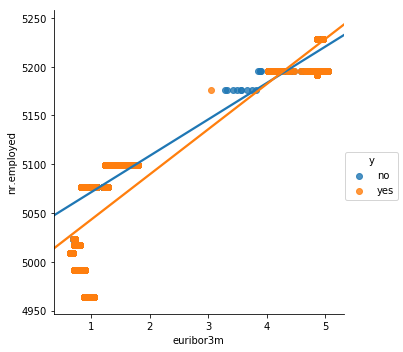

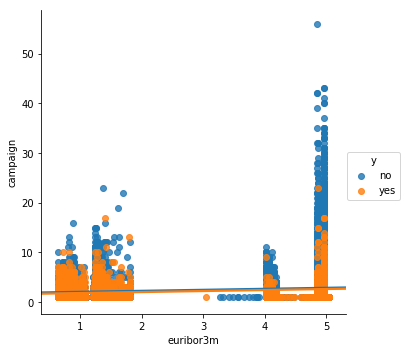

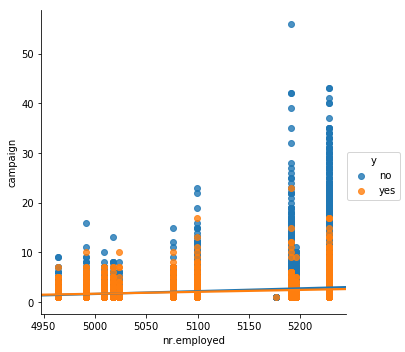

In [19]:
for i in range(len(numeric)):
    for j in range(i+1,len(numeric)):
        sns.lmplot(x=numeric[i],y=numeric[j],hue=predict,data=df)
        plt.show()

campaign,age,previous,duration,emp.var.rate are the attributes which have a clear decision boundary

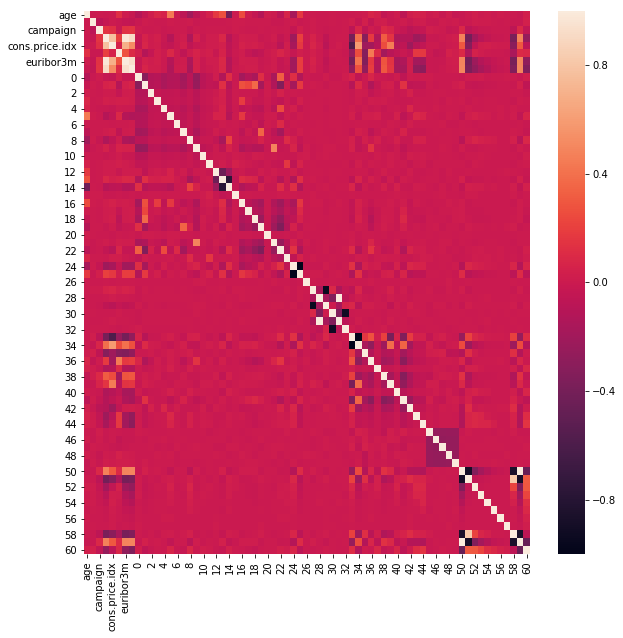

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

The black parts and the white parts shows the most correlated parts

In [21]:
from sklearn.feature_selection import SelectKBest

In [22]:
from sklearn.feature_selection import chi2

In [23]:
df["y"]=[1 if i=="yes" else 0 for i in df["y"]]

In [24]:
X = df[[i for i in df.columns if i != "y"]]  #independent columns
y = df["y"]    #target column i.e price range

C:\Users\Sushavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[7.34320115e-02 2.20876469e-01 5.46552145e-02 1.47418011e-02
 2.11162941e-02 1.63634481e-02 8.47659091e-02 3.00794140e-02
 1.56624160e-02 9.56960934e-03 4.84813101e-03 3.90483418e-03
 8.26149020e-03 7.72033573e-03 5.49635409e-03 7.27102714e-03
 5.48589450e-03 1.27343915e-02 4.76578762e-03 2.26944686e-03
 9.51055405e-03 1.45326302e-02 1.26968995e-02 6.90316532e-04
 7.27643291e-03 5.57635895e-03 8.94441671e-03 1.37526715e-02
 2.59815660e-04 1.08116749e-02 1.49058480e-02 6.72112222e-03
 6.19070560e-03 5.61887200e-03 7.00611115e-08 1.58033789e-02
 1.98325760e-03 1.65478141e-02 1.18365370e-02 2.54901459e-03
 1.16958684e-02 8.15083295e-03 6.63778990e-03 5.29998404e-03
 2.39829734e-03 1.29676338e-03 3.26030265e-03 5.30174301e-03
 8.84720210e-03 1.08911112e-02 4.21078735e-03 5.72380306e-03
 2.82105816e-03 1.25162083e-02 1.39048882e-02 1.41030091e-02
 1.28398221e-02 1.33945790e-02 5.54816761e-03 4.61374750e-03
 3.63276804e-03 2.13927720e-03 6.84866285e-04 2.65717353e-04
 2.22874545e-05 1.871858

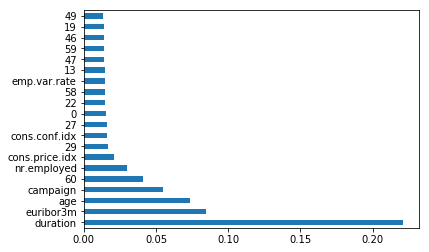

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)#using inbuilt class features_importances_ from tree classifier
#plot graphs of feature instances for better visualization
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

In [26]:
# we get that most of the numeric variables that we used were giving the best results
df_select=df[feat_importances.nlargest(20).index.values]
df_select["y"]=df["y"]
X=df_select[[i for i in df_select.columns if i != "y"]].values
y=df_select["y"].values

C:\Users\Sushavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

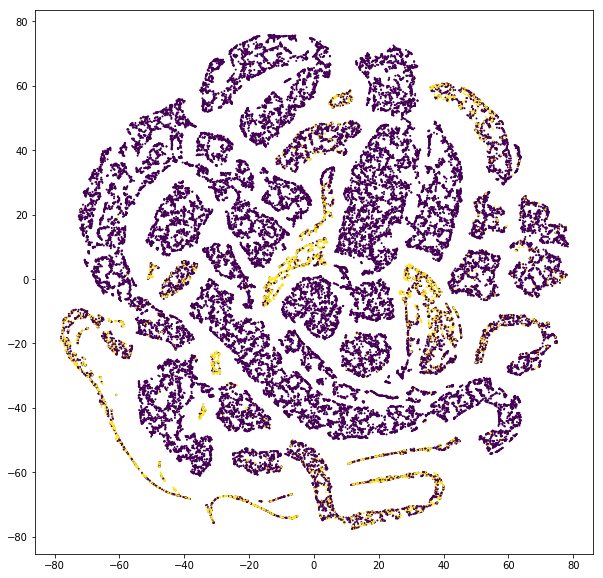

In [31]:
s = [1 for n in range(len(X_embedded[:,0]))]
plt.figure(figsize=(10,10))
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=df[predict].values,s=s)
plt.show()
#these tsne plots show a clear distinction between the yes and no clusters..

In [32]:
#we can use knn classifier in this tsne results variables..
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#split dataset into train and test data according to stratification..
X_train, X_test, y_train, y_test = train_test_split(X_embedded, y, test_size=0.2, random_state=1, stratify=y)

In [33]:
#fitting the model and predictions on the test data..
from sklearn.metrics import accuracy_score

for i in range(10,400,10):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)

    print(accuracy_score(neigh.predict(X_test),y_test))

0.9047098810390871
0.907623209516873
0.9094440398154892
0.9102937606215101
0.9104151493080845
0.9094440398154892
0.9083515416363195
0.9077445982034474
0.907016266084001
0.9056809905316825
0.9043457149793639
0.9047098810390871
0.9037387715464918
0.9038601602330663
0.9038601602330663
0.9015537751881525
0.9014323865015781
0.9019179412478757
0.9016751638747269
0.9003398883224083
0.899368778829813
0.8991260014566642
0.899368778829813
0.8998543335761107
0.8992473901432386
0.8998543335761107
0.8998543335761107
0.8996115562029618
0.8988832240835154
0.8982762806506434
0.8974265598446225
0.8977907259043457
0.8969410050983249
0.8970623937848993
0.8964554503520272
0.8964554503520272
0.8954843408594318
0.894634620053411
0.894634620053411


 Here we are getting maximum accuracy for the k = 60 here
 But here we have a unbalanced dataset..

In [34]:
# we can do oversampling on the non tsne X to get a balanced result..
x_train, x_val, y_train, y_val = train_test_split(X, y,
                                                  test_size = .1,
                                                  random_state=12)

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import  metrics
#applying somte for oversampling...
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [41]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [42]:
print('Validation Results')
print(clf_rf.score(x_val, y_val))
print(recall_score(y_val, clf_rf.predict(x_val)))

Validation Results
0.9133284777858703
0.5695364238410596


fitting a xg-boost model

In [47]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[predict].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='logloss', early_stopping_rounds=early_stopping_rounds,verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[predict],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print(metrics.classification_report(dtrain[predict].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[predict], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.feature_importances_).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.show()

In [48]:
predictors = [x for x in df_select.columns if x not in [predict]]
df_res=pd.DataFrame(x_train_res,columns=predictors)
df_res["y"]=y_train_res

[0]	train-logloss:0.641042+0.00713922	test-logloss:0.641129+0.00722359
[1]	train-logloss:0.584997+0.00537749	test-logloss:0.585288+0.00543396
[2]	train-logloss:0.540304+0.00606256	test-logloss:0.540939+0.00600808
[3]	train-logloss:0.500069+0.0052686	test-logloss:0.500893+0.00523783
[4]	train-logloss:0.467544+0.00370288	test-logloss:0.468558+0.00409584
[5]	train-logloss:0.437555+0.00359355	test-logloss:0.43879+0.00421534
[6]	train-logloss:0.412865+0.002551	test-logloss:0.414179+0.00313028
[7]	train-logloss:0.389604+0.00219868	test-logloss:0.390923+0.00268283
[8]	train-logloss:0.369239+0.00282223	test-logloss:0.370622+0.00348608
[9]	train-logloss:0.350984+0.00222202	test-logloss:0.352436+0.0030296
[10]	train-logloss:0.334247+0.00208913	test-logloss:0.335902+0.00285886
[11]	train-logloss:0.318365+0.00206249	test-logloss:0.320066+0.00286716
[12]	train-logloss:0.304312+0.00227249	test-logloss:0.306127+0.00317867
[13]	train-logloss:0.292049+0.00287284	test-logloss:0.294078+0.00383159
[14]	tr

[113]	train-logloss:0.094961+0.000570259	test-logloss:0.103771+0.00163512
[114]	train-logloss:0.0948064+0.000562492	test-logloss:0.1037+0.00167992
[115]	train-logloss:0.0945824+0.000544701	test-logloss:0.10356+0.00165136
[116]	train-logloss:0.094406+0.000536914	test-logloss:0.103496+0.00163565
[117]	train-logloss:0.0942754+0.000535493	test-logloss:0.10343+0.00162856
[118]	train-logloss:0.0940972+0.000520697	test-logloss:0.103339+0.00163953
[119]	train-logloss:0.093931+0.000507316	test-logloss:0.103239+0.00163079
[120]	train-logloss:0.0937344+0.000516204	test-logloss:0.103134+0.00160831
[121]	train-logloss:0.093551+0.000509616	test-logloss:0.103002+0.00165197
[122]	train-logloss:0.0934118+0.000485823	test-logloss:0.102912+0.0016891
[123]	train-logloss:0.0932356+0.000469819	test-logloss:0.10282+0.00167925
[124]	train-logloss:0.0930822+0.000479076	test-logloss:0.10275+0.0016806
[125]	train-logloss:0.0929178+0.000447196	test-logloss:0.102646+0.00164525
[126]	train-logloss:0.0927834+0.00045

[223]	train-logloss:0.0816968+0.000467779	test-logloss:0.0992844+0.00154876
[224]	train-logloss:0.081617+0.000456976	test-logloss:0.0992636+0.0015574
[225]	train-logloss:0.081529+0.00047611	test-logloss:0.0992542+0.00154841
[226]	train-logloss:0.0814568+0.000468941	test-logloss:0.0992358+0.00158533
[227]	train-logloss:0.0813652+0.000455194	test-logloss:0.0992398+0.00156403
[228]	train-logloss:0.0812898+0.000448122	test-logloss:0.0992682+0.00157066
[229]	train-logloss:0.0812104+0.000425524	test-logloss:0.0992654+0.00156956
[230]	train-logloss:0.0811108+0.000439509	test-logloss:0.099263+0.00156571
[231]	train-logloss:0.0810182+0.00045173	test-logloss:0.0992386+0.00156142
[232]	train-logloss:0.0809424+0.000429575	test-logloss:0.099218+0.00159052
[233]	train-logloss:0.0808538+0.00041203	test-logloss:0.099215+0.00158198
[234]	train-logloss:0.0807738+0.000395832	test-logloss:0.0992118+0.00157751
[235]	train-logloss:0.080679+0.000412265	test-logloss:0.0991724+0.00158609
[236]	train-logloss:0.

[332]	train-logloss:0.073479+0.000364396	test-logloss:0.0990768+0.00186469
[333]	train-logloss:0.0734112+0.000346353	test-logloss:0.099067+0.00187102
[334]	train-logloss:0.073354+0.000333153	test-logloss:0.0990638+0.00185735
[335]	train-logloss:0.0732882+0.000345974	test-logloss:0.0990648+0.00187778
[336]	train-logloss:0.073208+0.000353218	test-logloss:0.0990664+0.00188423
[337]	train-logloss:0.0731436+0.000355193	test-logloss:0.099079+0.00190615
[338]	train-logloss:0.0730836+0.000350252	test-logloss:0.099078+0.00191718
[339]	train-logloss:0.0730212+0.000361912	test-logloss:0.0990874+0.00190172
[340]	train-logloss:0.0729492+0.000360306	test-logloss:0.099093+0.0018938
[341]	train-logloss:0.0728696+0.000362706	test-logloss:0.0991014+0.00190209
[342]	train-logloss:0.0728066+0.000359869	test-logloss:0.0991118+0.00193101
[343]	train-logloss:0.072731+0.000361373	test-logloss:0.0991312+0.00193139
[344]	train-logloss:0.0726776+0.000361863	test-logloss:0.0991238+0.00194159
[345]	train-logloss:0

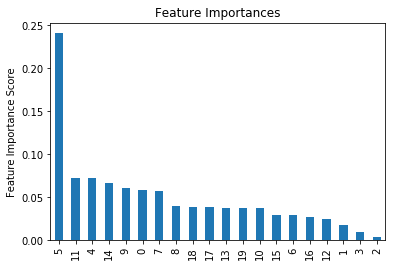

In [49]:
#Choose all predictors and perform cross-validation to select hyperparameters
xgb1= XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, df_res, predictors)

In [ ]:
The f1 score is significantly larger than the random forest classifier.We get a good result with XGBOOST model and oversampling.

Here,we see that 0,1,2 has a lot of feature importance therefore we can take certain values here to increase the profit and minimize the cost.

 The 0,1,2 columns are the categorical 1st,2nd and 3rd variables to be encoded that are job services of a tag "services", "unknown", and "entreprenuer".

In [51]:
df1 = pd.read_csv("bank-additional-full.csv",sep=";")

In [54]:
for i in df1[categorical]:
    print(set(df1[i]))

{'services', 'management', 'unknown', 'admin.', 'unemployed', 'technician', 'student', 'retired', 'entrepreneur', 'self-employed', 'housemaid', 'blue-collar'}
{'single', 'married', 'divorced', 'unknown'}
{'basic.4y', 'unknown', 'basic.9y', 'professional.course', 'university.degree', 'basic.6y', 'illiterate', 'high.school'}
{'no', 'unknown', 'yes'}
{'no', 'unknown', 'yes'}
{'no', 'unknown', 'yes'}
{'cellular', 'telephone'}
{'aug', 'apr', 'oct', 'sep', 'nov', 'jul', 'dec', 'may', 'jun', 'mar'}
{'thu', 'mon', 'wed', 'tue', 'fri'}
{0, 1, 2, 3, 4, 5, 6, 7}
{'nonexistent', 'success', 'failure'}


#  Recommendations to the Marketing Team based on our analysis and modelling

[] represents significant variables

[Cons.Price.Idx,Cons.Conf.Idx]
Recommendations
1.Collaborate with the economic experts
2.Be a fast mover capture customers before the competitiors capture them.

[Age]
Recommendations
1.Target relatively old aged people.
2.Convey peace of mind,safe investment,steady income source as the value proposition.

[Duration,Mode of Contact :Telephone]
Recommendations
1.Try to engage customers and have longer calls.
2.Preferably use telephones as the mode of contact.

[Campaign]
1.Prioritize those customers who were part of the previous marketing campaign.